<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.)_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("fivethirtyeight")

See the Matplotlib documentation on [style sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [2]:
# run this line if your plots don't automatically show up
# %matplotlib inline

In [3]:
DATA_DIR = "../assets/data/"

# Read in the ames data.
ames_path = f"{DATA_DIR}/ames_mod.csv"
ames_df = pd.read_csv(ames_path)

# Read in the drinks data.
drink_cols = ["country", "beer", "spirit", "wine", "liters_alcohol", "continent"]
drinks_path = f"{DATA_DIR}/drinks.csv"
drinks = pd.read_csv(drinks_path, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo_path = f"{DATA_DIR}/ufo.csv"
ufo = pd.read_csv(ufo_path, parse_dates=["Time"])
ufo['Year'] = ufo.Time.dt.year

# Read in stock price data
stocks_path = f"{DATA_DIR}/stocks.csv"
stocks = (
    pd.read_csv(stocks_path, parse_dates=["date"], index_col="date")
    .resample("M")
    .agg("mean")
)

stocks



,AEP,HPQ,JNJ,KO,MCD
date,,,,,
1970-01-31,29.708333,0.376607,1.200479,0.867498,0.338771
1970-02-28,28.296053,0.355211,1.125365,0.850672,0.354397
1970-03-31,30.523810,0.324930,1.079489,0.846106,0.347639
1970-04-30,30.306818,0.294436,1.006550,0.797704,0.306538
1970-05-31,25.535714,0.228164,0.919436,0.720548,0.265334
...,...,...,...,...,...
2018-04-30,68.608095,21.517143,128.539048,43.801429,160.805714
2018-05-31,67.208636,22.037273,123.520454,42.242273,162.601818
2018-06-30,66.216191,23.345238,122.277619,43.573810,162.999049


## Plot Types

### Line plots

Use a line plot to show the trend of a numerical variable over time.

*Count the number of UFO reports each year and sort the result by year*

In [4]:
report_counts = ufo.Year.value_counts().sort_index()

report_counts

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

*Create a line plot of the number of UFO sightings over time*

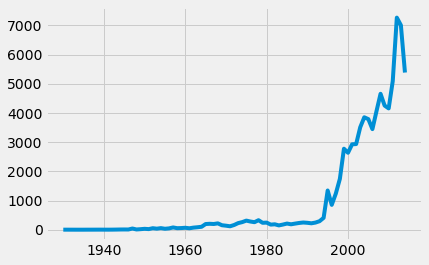

In [5]:
ax = report_counts.plot()

*Use the drinks dataset to create a line plot showing the number of countries per continent*

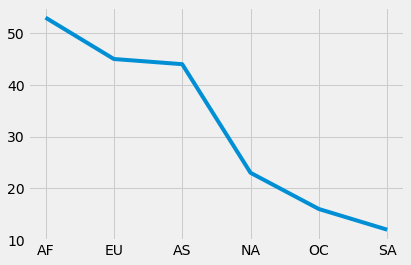

In [6]:
ax = drinks.continent.value_counts().plot()

***

**Exercise**

*Time:* 1 mins\
*Format:* Individual

- The first plot above makes sense, but the second doesn't. Why? 🎤

Second plot has distinct groups and values associated, not showing trends

***

*Plot the same data as a (horizontal) bar plot -- a much better choice!*

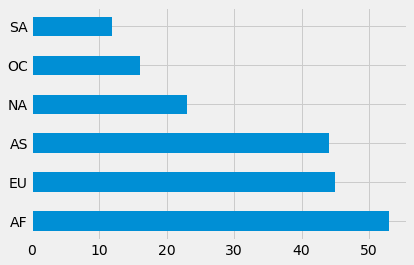

In [7]:
ax = drinks.continent.value_counts().plot.barh()

*Create a line plot of the columns in the generated DataFrame `stocks`*

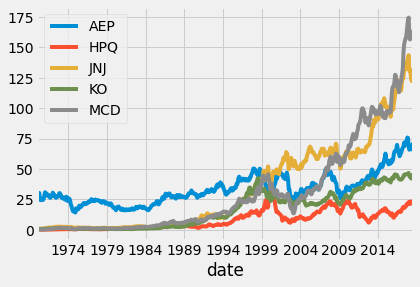

In [8]:
ax = stocks.plot()

*Create a separate line plot for each column of `stocks` with consistent scales on their y axes*

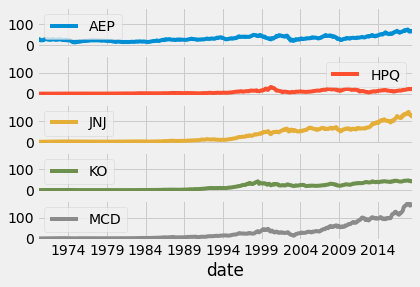

In [9]:
ax = stocks.plot(subplots=True, sharey=True)

#### Modifying Plot Style

*Set figure size to 15 in. x 8 in. at the default resolution (100 DPI as of matplotlib 3.1.1)*

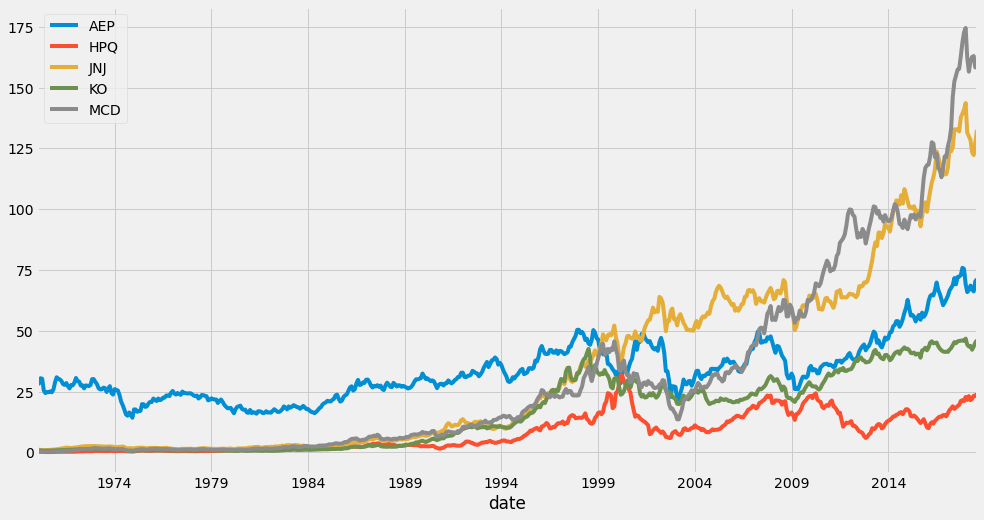

In [10]:
ax = stocks.plot(figsize=(15, 8))

*Plot "AEP" from `stocks` in crimson*

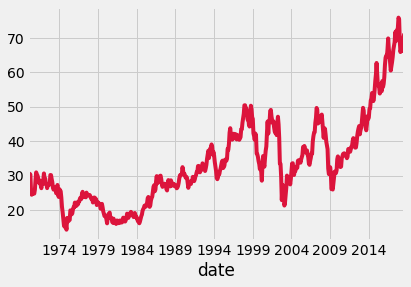

In [11]:
ax = stocks.AEP.plot(c='crimson')

[Matplotlib documentation on specifying colors](https://matplotlib.org/stable/api/colors_api.html)

*Plot a sample of "AEP" as a red dotted line, "MCD" as disconnected downward-pointing blue triangles*

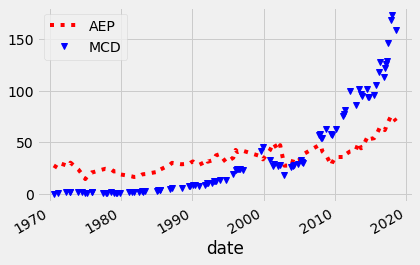

In [12]:
ax = stocks.sample(100)[['AEP', 'MCD']].plot(style={'AEP':':r', 'MCD':'vb'})

Matplotlib documentation on [specifying line styles](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) and on [markers](https://matplotlib.org/stable/api/markers_api.html)

***

**Exercise.** *Style a line plot.*

*Time:* 3 mins\
*Format:* Individual

- Create a line plot of `JNJ` and `KO` in the stocks data with the following styling: 🧵
    - For `JNJ`, use a solid green line.
    - For `KO`, use a blue dashed line.
    - Change the figure size to a width of 12 and height of 6.

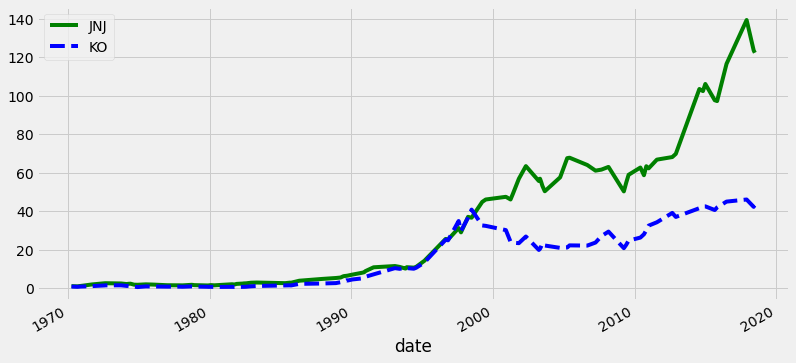

In [13]:
ax = stocks.sample(100)[['JNJ', 'KO']].plot(style={'JNJ': 'g', 'KO': '--b'}, figsize=(12, 6))

- **BONUS:** play around with other ways to style this plot. 🚫

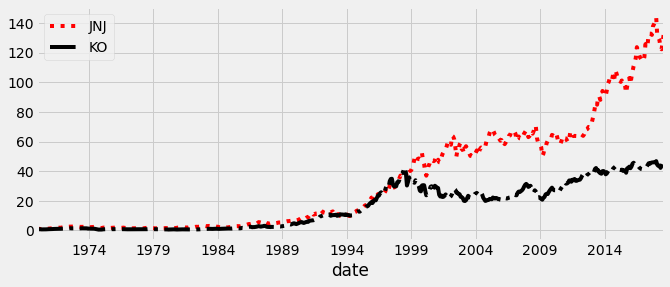

In [14]:
ax = stocks[['JNJ', 'KO']].plot(style={'JNJ': ':r', 'KO': '-.k'}, figsize=(10, 4))

***

### Bar Plots

Use a bar plot to show a numerical comparison across different categories.

*Calculate the mean drink amounts for each continent by category*

In [15]:
mean_by_continent = drinks.groupby('continent').mean()

mean_by_continent

,beer,spirit,wine,liters_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


*Display these numbers in side-by-side bar plots*

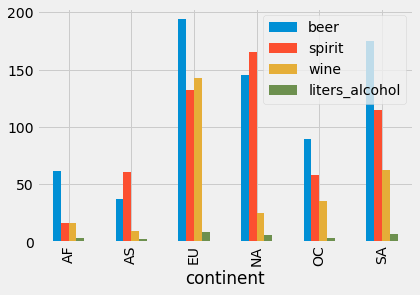

In [16]:
ax = mean_by_continent.plot.bar()

*Drop liters_alcohol, which is in different units*

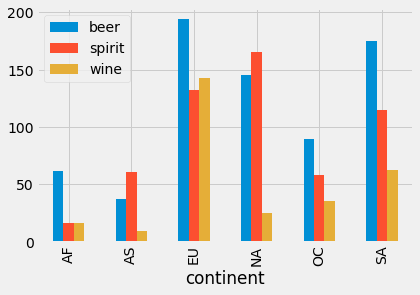

In [17]:
mean_drinks_by_continent = mean_by_continent.drop(columns='liters_alcohol')

ax = mean_drinks_by_continent.plot.bar()

*Sort the continent x-axis by amount of beer consumed*

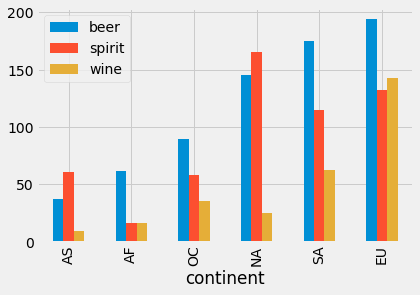

In [18]:
ax = mean_drinks_by_continent.sort_values('beer').plot.bar()

*Show the numbers for beer, wine, and spirits in a stacked bar plot*

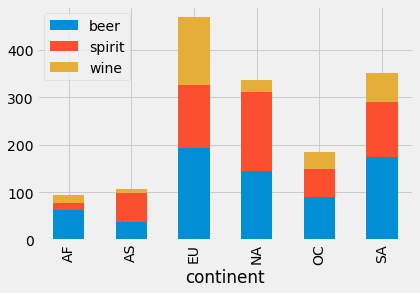

In [19]:
ax = mean_drinks_by_continent.plot.bar(stacked=True)

The stacked bar plot makes it easier to compare *total* servings across continents (e.g. SA vs. NA), while the unstacked plot makes it easier to compare within a drink type (e.g. wine in AS vs. OC).

In general with data visualization, you want to think about what comparisons you are supporting!

*Use `Axes` methods to modify our plot*

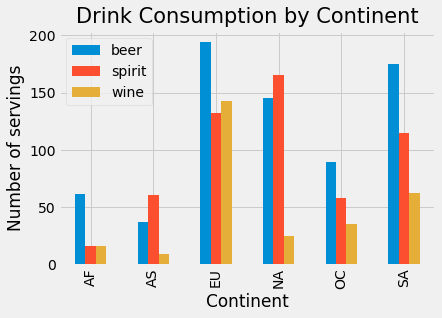

In [20]:
ax = mean_drinks_by_continent.plot.bar()

ax.set_title('Drink Consumption by Continent', fontsize=21, y=1.01)

ax.legend(loc='upper left')

ax.set_ylabel('Number of servings', fontsize=17)

ax.set_xlabel('Continent', fontsize=17);

*Use one call to `.set()` instead of calls to multiple methods such as `.set_title()`.*

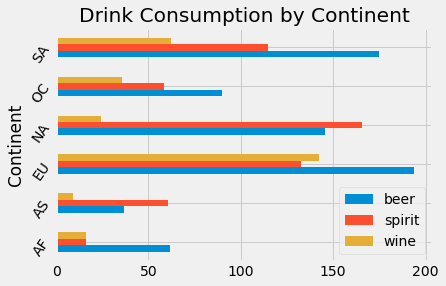

In [21]:
ax = mean_drinks_by_continent.plot.barh(
    title='Drink Consumption by Continent',
    ylabel='Number of servings',
    xlabel='Continent',
    rot=55
)

ax.legend(loc='lower right');

Making one call to `.set()` simplifies the code a bit, while making calls to individual methods for separate plot components provides more control, e.g. over font sizes.

See the [legend() docs](https://matplotlib.org/stable/api/legend_api.html?highlight=legend#matplotlib.legend.Legend) for information about `loc`.

***

**Exercise.** *Use `Axes` methods to modify plots*

*Time:* 4 mins\
*Format:* Pairs


- Create a line plot using `stocks` and style it as follows: 🧵
    - Give the plot a large title of your choosing. 
    - Move the legend to the lower-left corner.

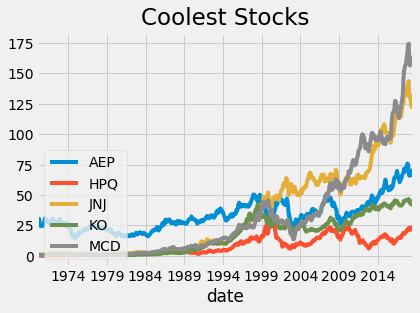

In [26]:
ax = stocks.plot()

ax.set_title('Coolest Stocks', fontsize=23, y=1.01)
ax.legend(loc='lower left');

- Make a horizontal bar chart from the last row of `stocks`, and put the legend in the top left. 🧵

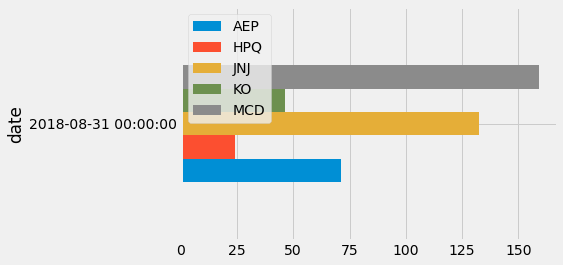

In [23]:
ax = stocks.tail(1).plot.barh()

ax.legend(loc='upper left');

- Make a stacked horizontal bar chart from the last 12 rows of `stocks`. 🧵

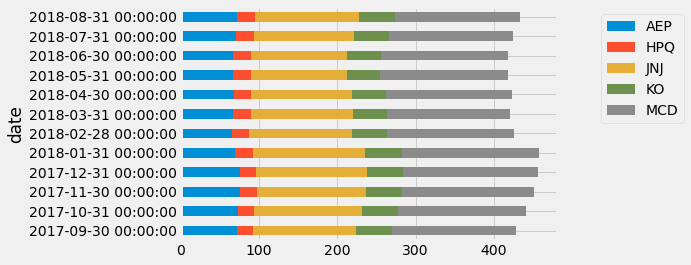

In [25]:
ax = stocks.tail(12).plot.barh(stacked=True);

ax.legend(bbox_to_anchor=(1.1, 1));

***

### Histograms

Use a histogram to show the distribution of a numerical variable.

*Plot sorted values for the beer column*

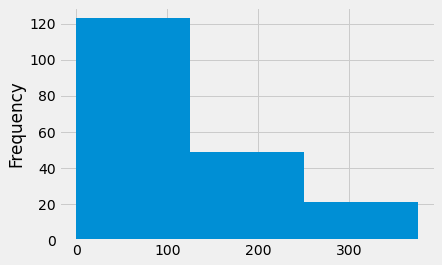

In [30]:
ax = drinks.beer.plot.hist(bins=3)

***

**Exercise**

*Time:* 1 mins\
*Format:* Individual

- What information does the plot above provide? 🎤

about 125 for Y-axis for 0-120 on X-axis

***

*Try 20 bins*

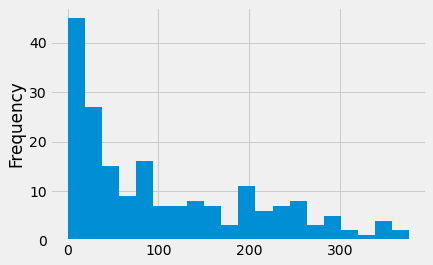

In [31]:
ax = drinks.beer.plot.hist(bins=20)

*Try 200 bins*

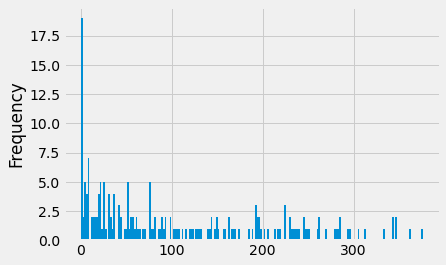

In [32]:
ax = drinks.beer.plot.hist(bins=200)

There are several standard [strategies](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html) for choosing a good bin count, but getting a good result often requires some experimentation.

***

**Exercise**

*Time:* 1 mins\
*Format:* Individual

- Create a histogram with pandas for `SalePrice` in the `ames_df` DataFrame, choosing a bin count that is neither too coarse nor too fine. 🧵

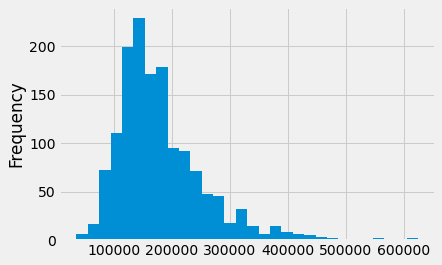

In [39]:
ax = ames_df.SalePrice.plot.hist(bins=30)

***

In addition to the `.plot()` method, DataFrames have `.hist()` and `.boxplot()` methods that are more specialized for those specific plot types. (As of Pandas 0.25.2, `.hist()` and `.boxplot()` are the *only* specialized methods for specific plot types.)

*Use `by` argument to `hist` function to make a histogram of beer servings for each continent*

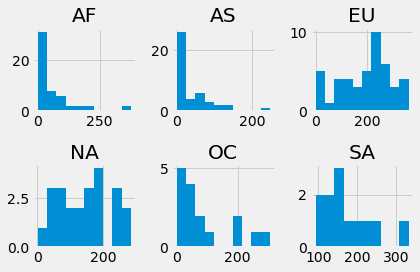

In [44]:
# ax = drinks.beer.plot.hist(by='continent')

axs = drinks.hist(
    column = 'beer',
    by = 'continent',
    xrot = 0,
    layout = (2,3),
)
plt.gcf().tight_layout()

***

**Exercise**

*Time:* 1 mins\
*Format:* Individual

- How are the histograms above potentially misleading? 🎤

X- and Y- axis are using different scales

***

*Share the x- and y-axes.*

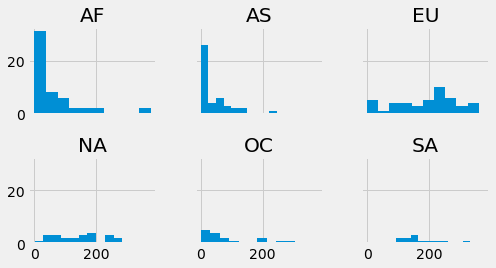

In [49]:
axs = drinks.hist(
    column = 'beer',
    by = 'continent',
    xrot = 0,
    layout = (2, 3),
    figsize = (8, 4),
    sharex = True, 
    sharey = True
)


Perhaps instead of the *counts*, we would like the *relative frequencies* to be comparable across plots.

*Share the x- and y-axes, and use relative frequencies instead of counts.*

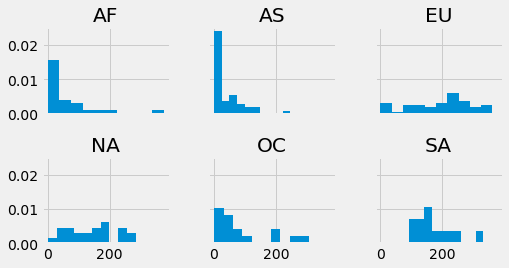

In [50]:
axs = drinks.hist(
    column = 'beer',
    by = 'continent',
    xrot = 0,
    layout = (2, 3),
    figsize = (8, 4),
    sharex = True, 
    sharey = True,
    density = True
)


### Box Plots

*Make box plots for `drinks`*

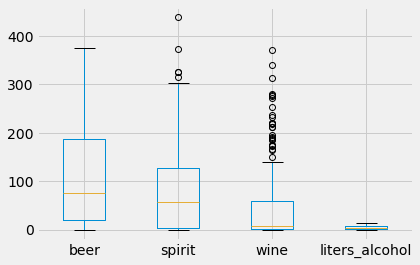

In [51]:
ax = drinks.plot.box()

A box plot displays the **five-number summary** of a distribution:

| **name**                                | **meaning**                        | **box plot representation**           |
|-----------------------------------------|------------------------------------|---------------------------------------|
| max                                     | largest value                      | top bar, unless there are outliers    |
| 3rd quartile                            | value greater than 75% of the data | top of box                            |
| median                                  | value greater than 50% of the data | yellow bar inside box                 |
| 1st quartile                            | value greater than 25% of the data | bottom of box                         |
| min                                     | smallest value                     | bottom bar, unless there are outliers |

Matplotlib treats points sufficiently far outside the box as outliers, displaying them as individual circles. See the [docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html) for an explanation of what it considers an outlier.

*Show "five-number summary" for wine*

In [53]:
#ax = drinks.wine.plot.box()

drinks.wine.describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: wine, dtype: float64

***

**Exercise**

*Time:* 1 mins\
*Format:* Individual

- `wine` has a median close to zero, but it also has many large outliers. What word could we use to describe its distribution? 🎤

(+ / right) skewed

***

*Create a box plot of beer servings grouped by continent, using the `boxplot` convenience method*

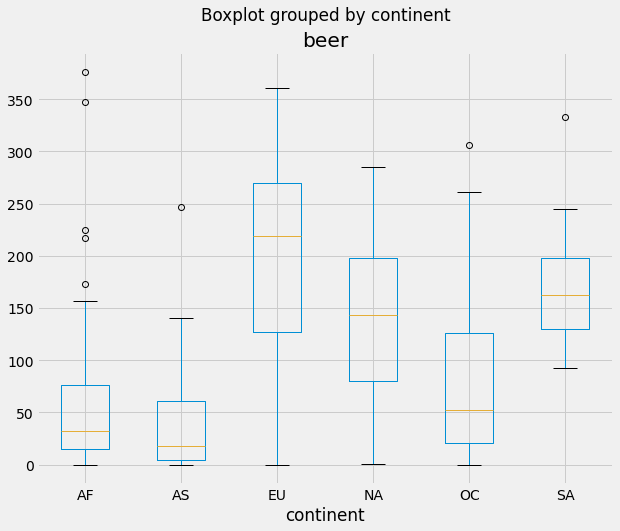

In [58]:
ax = drinks.boxplot(column = 'beer', by = 'continent', figsize=(10, 8))

*Create a box plot of all numeric columns grouped by continent*

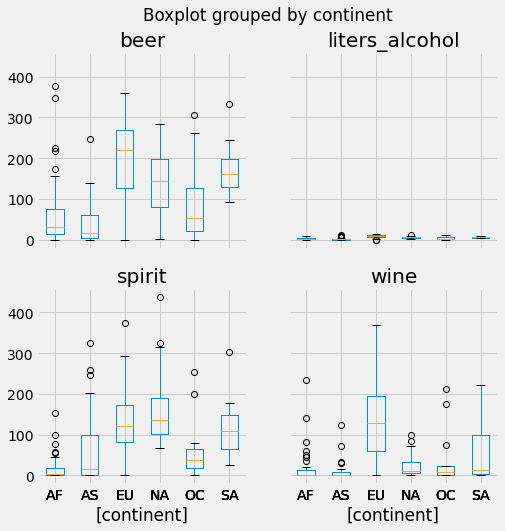

In [60]:
ax = drinks.boxplot(by = 'continent', figsize= (8, 8))

### Scatter plots

Use a scatter plot to show the relationship between two numerical variables.

*Compare `beer` and `wine` with  a scatter plot*

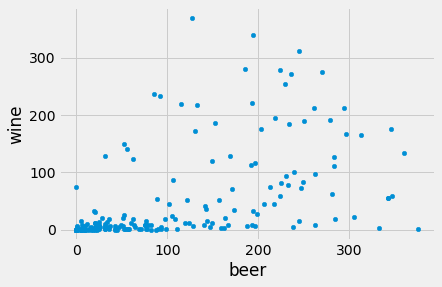

In [63]:
ax = drinks.plot.scatter(x='beer', y='wine')

*Add transparency so that we can see where points overlap*

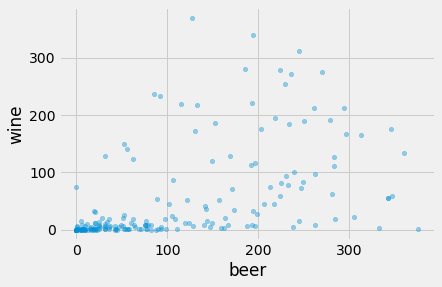

In [65]:
ax = drinks.plot.scatter(x='beer', y='wine', alpha=0.4)

With `alpha=0.2`, it takes 5 overlapping points to reach full opacity. (In general, it takes 1/alpha.)

*Bring in a third variable: vary point color by spirit servings. (**Note:** Without `sharex=False` we lose the label on the scatter plot x axis because of how the scatter plot and the color bar interact.)*

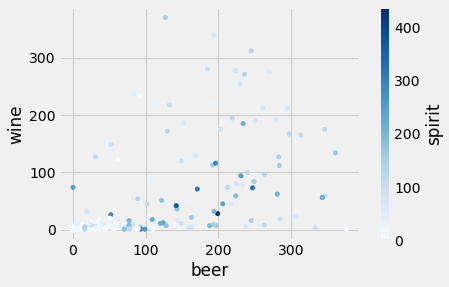

In [66]:
ax = drinks.plot.scatter(x='beer', y='wine', c='spirit', colormap='Blues')

See the Matplotlib documentation on [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous).

*Bring in a fourth variable: vary point size by total liters of alcohol*

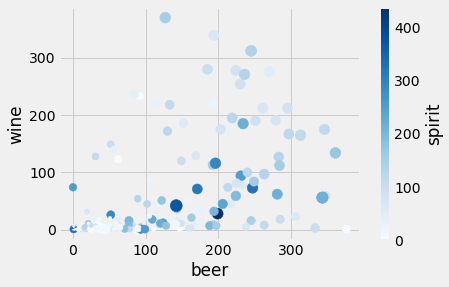

In [71]:
ax = drinks.plot.scatter(x='beer', 
                         y='wine', 
                         c='spirit', 
                         colormap='Blues', 
                         s=drinks.liters_alcohol * 10
)

In [72]:
(drinks.liters_alcohol * 15).describe()

count    193.000000
mean      70.756477
std       56.599472
min        0.000000
25%       19.500000
50%       63.000000
75%      108.000000
max      216.000000
Name: liters_alcohol, dtype: float64

*Set color and marker size to a constant*

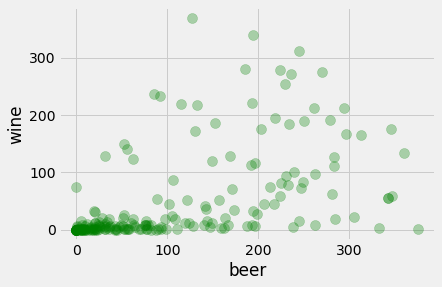

In [77]:
ax = drinks.plot.scatter(
    x='beer',
    y='wine',
    s=100,
    c='green',
    alpha=0.3
)

*Scatter matrix of three numerical columns*

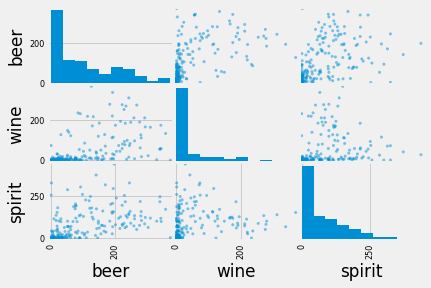

In [79]:
axs = pd.plotting.scatter_matrix(drinks[['beer', 'wine', 'spirit']])

***

**Exercise.** *Create custom scatterplots.*

*Time:* 4 mins\
*Format:* Pairs

- Create a scatter plot of  `y=SalePrice` against `x=SF` from the Ames housing data. Make the figure 10x6 in. with dark green size 100 markers. 🧵

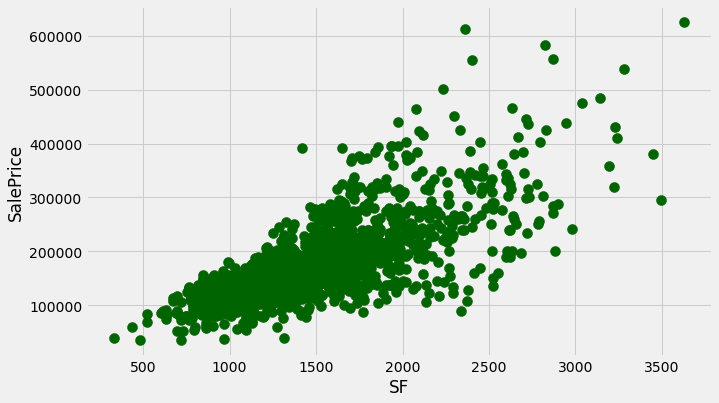

In [80]:
ax = ames_df.plot.scatter(y='SalePrice', x='SF', figsize=(10, 6), color='darkgreen', s=100)

- Change the marker size to the value of the "OverallQual" variable squared, and set `alpha` to `.3`. 🧵

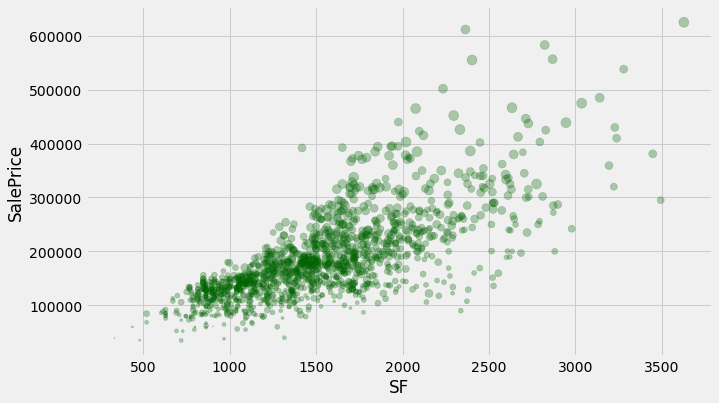

In [83]:
ax = ames_df.plot.scatter(
    y='SalePrice',
    x='SF',
    figsize=(10, 6),
    color='darkgreen',
    alpha=0.3,
    s=ames_df.OverallQual ** 2
)

- Use the default marker size, but use "OverallQual" to set the color with the "viridis" colormap.

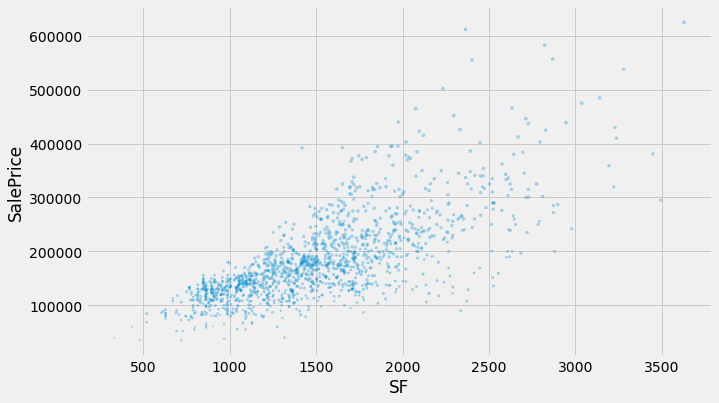

In [85]:
ax = ames_df.plot.scatter(
    y='SalePrice',
    x='SF',
    figsize=(10, 6),
    alpha=0.3,
    s='OverallQual',
    colormap='viridis'
)

- **BONUS:** What does this plot tell you about real estate prices in Ames, Iowa? 🧵

*Hint:* Think about what a trend line through the scatter plot would look like and how the sizes of the points relate to their position relative to that trend line.

SquareFoot and SalePrice have positive correlation, as one go up so does the other

***

## Seaborn

The `seaborn` package provides a high-level interface on top of `matplotlib` for creating statistical graphics. Here's one example of what you can do with it.

### Compare Matplotlib `scatter_matrix` to Seaborn `pairplot`

In [86]:
cols_to_keep = [
    "MSSubClass",
    "OverallQual",
    "OverallCond",
    "BsmtFinSF2",
    "LowQualFinSF",
    "BsmtHalfBath",
    "KitchenAbvGr",
    "EnclosedPorch",
    "PoolArea",
    "YrSold",
    "SalePrice",
    "YearBuilt",
]
ames_reduced = ames_df.loc[:, cols_to_keep]

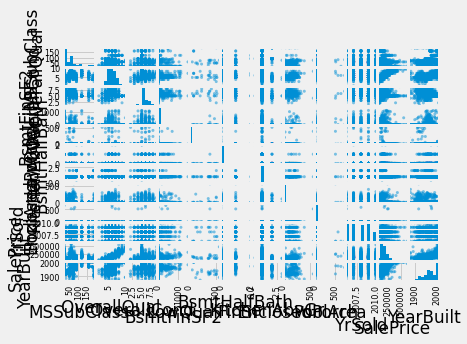

In [87]:
axs = pd.plotting.scatter_matrix(ames_reduced)

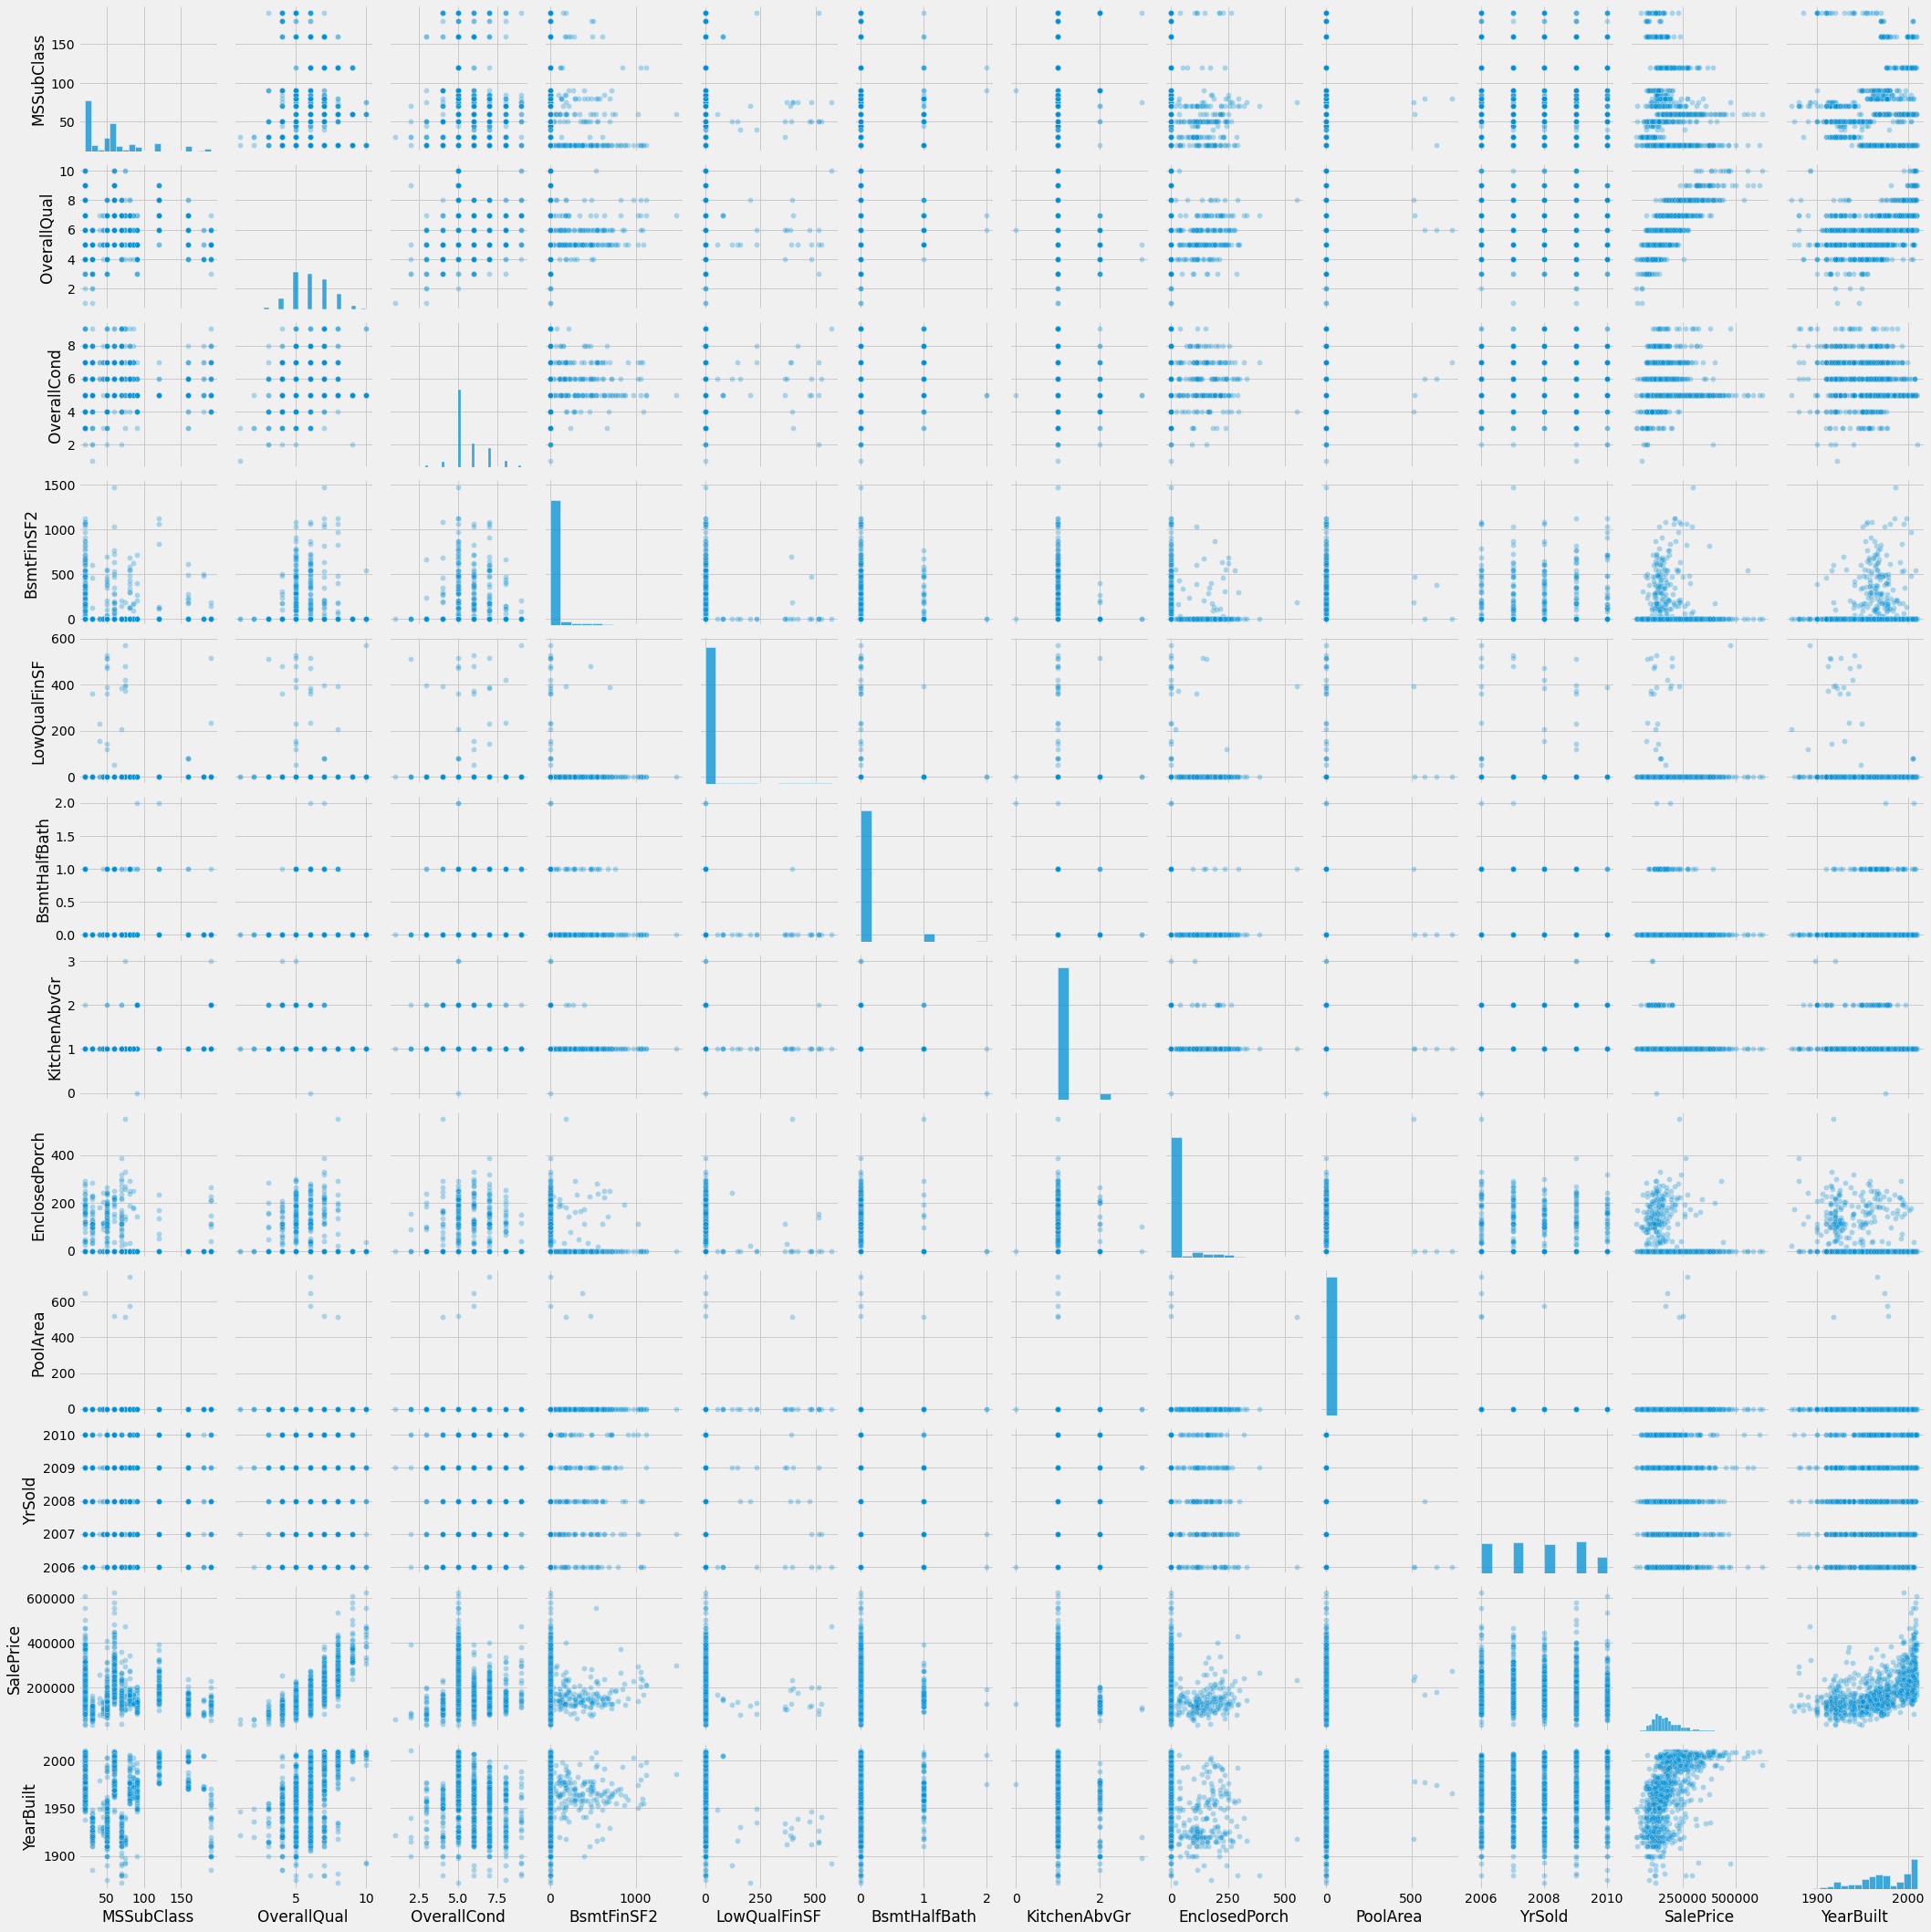

In [88]:
g = sns.pairplot(ames_reduced, plot_kws={'alpha':0.3})

*Pull the `Axes` array out of the `PairGrid` object*

In [89]:
g.axes

array([[<AxesSubplot:ylabel='MSSubClass'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='OverallQual'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='OverallCond'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='BsmtFinSF2'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:y

### Color by a Categorical Column

*Plot `beer` vs `wine` from `drinks`, coloring by `continent`*

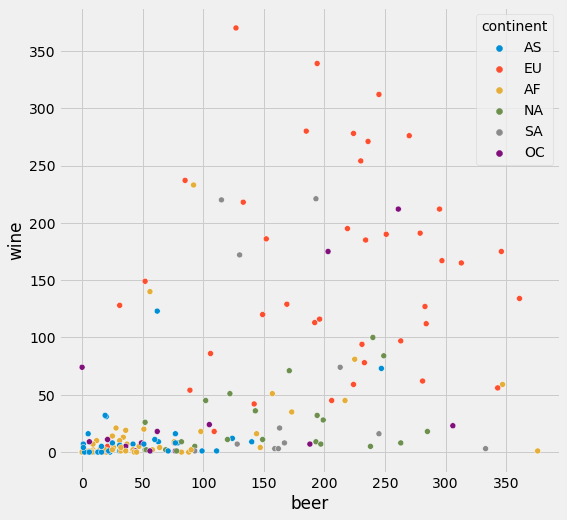

In [93]:
#plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=drinks, x='beer', y='wine', hue='continent')
ax.get_figure().set_size_inches(8, 8)

In base Matplotlib, you would have to first convert `continent` to a number and then color by that.

Seaborn is still using `matplotlib` under the hood, but it chooses more intelligent defaults. See its [documentation](https://seaborn.pydata.org/) for more information about what it can do.

## Going Deeper

### Understanding Matplotlib (Figures, Subplots, and Axes)

<img src="https://matplotlib.org/_images/anatomy.png" height="600" width="600">


From https://matplotlib.org/stable/gallery/showcase/anatomy.html

Matplotlib uses a blank canvas called a `Figure`. Within this canvas, we can contain smaller objects, each of which is called an `Axes`.

We have been starting with Pandas, using its plotting methods to generate Matplotlib `Axes` objects that we then manipulate. It is also possible to start with Matplotlib, generating a `Figure` and `Axes` objects first and then using `Axes` methods to create our plots.

*Plot Ames `SalePrice` against `SF` using Pandas methods*

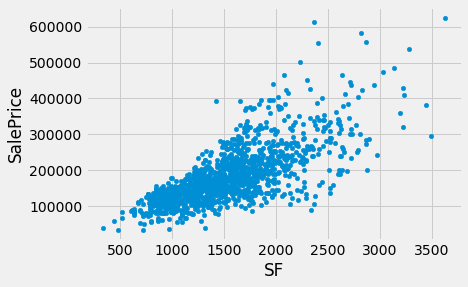

In [94]:
ax = ames_df.plot.scatter(y='SalePrice', x='SF')

*Plot Ames `SalePrice` against `SF` **without** Pandas methods*

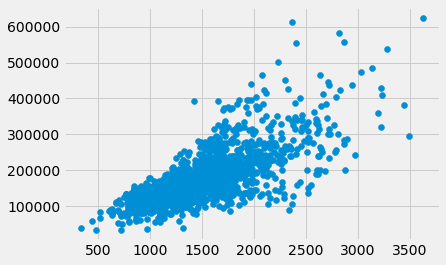

In [96]:
fig, ax = plt.subplots()
ax.scatter(x=ames_df.SF, y=ames_df.SalePrice);

Alternatively, we can create `Axes` objects and then tell Pandas to use them.

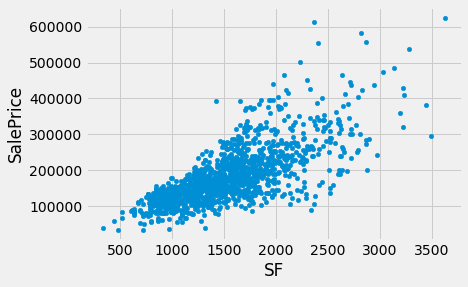

In [97]:
fig, ax = plt.subplots()

ames_df.plot.scatter(x='SF', y='SalePrice', ax=ax);

This approach allows us to create custom grids of plots.

*Initialize figure containing 2x3 grid of `Axes` objects*

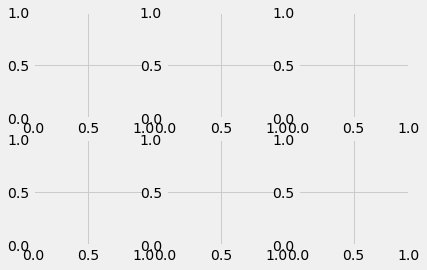

In [99]:
fig, axs = plt.subplots(nrows=2, ncols=3)

*Plot lines on specific axes*

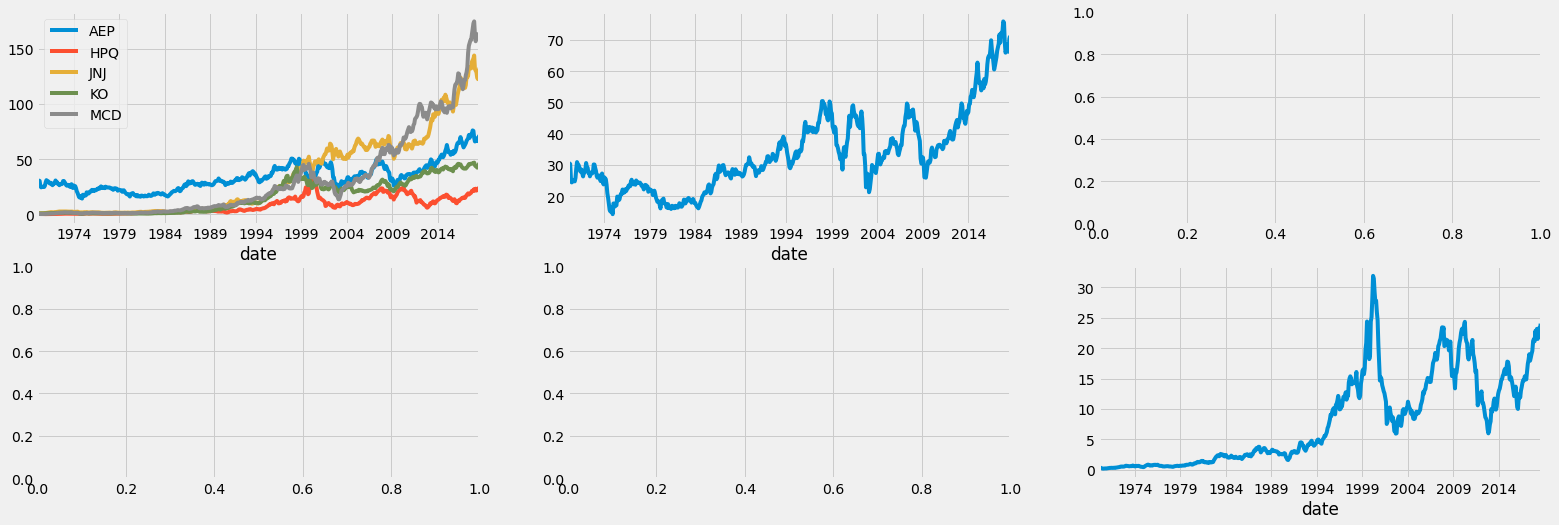

In [106]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24, 8))
stocks.plot(ax=axs[0, 0])
stocks.AEP.plot(ax=axs[0, 1])
stocks.HPQ.plot(ax=axs[1, 2]);

### The Pandas Plotting Interface

The Pandas `plot` method produces a line plot by default.

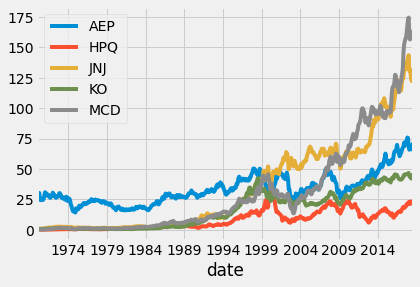

In [107]:
ax = stocks.plot()

You can produce a line plot more explicitly by using `.plot` as an *accessor* for the `.line()` method, just like with other plot types:

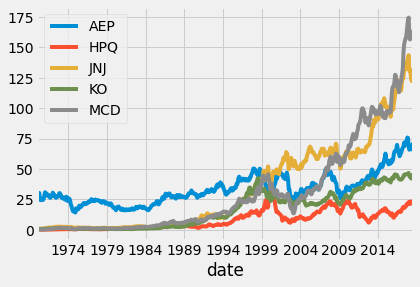

In [108]:
ax = stocks.plot.line()

`stocks.plot(kind='<kind>')` is equivalent to `stocks.plot.<kind>`():

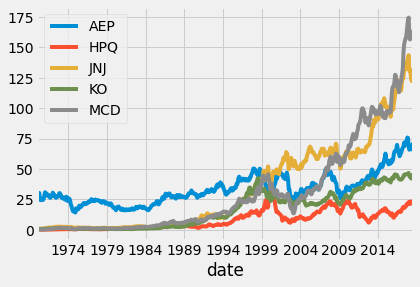

In [109]:
ax = stocks.plot(kind="line")

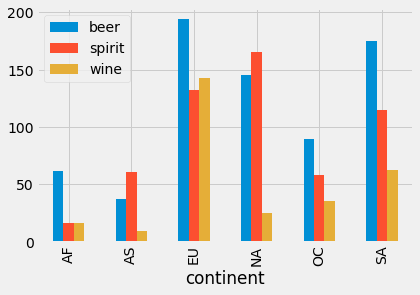

In [110]:
ax = mean_drinks_by_continent.plot.bar()

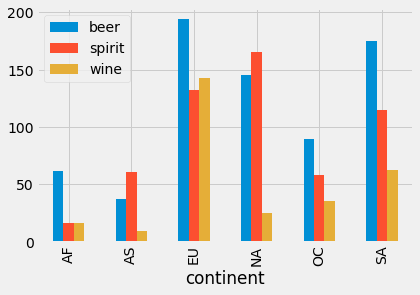

In [111]:
ax = mean_drinks_by_continent.plot(kind="bar")

I prefer `.plot.<kind>()` to `.plot(kind="<kind>")` because it is shorter and supports tab completion.

In [ ]:
# Uncomment and hit tab at the end of this line to see available plotting methods
# stocks.plot.

### Displaying Plots

The line `%matplotlib inline` at the top of this notebook tells JupyterLab to display our plots inside the notebook. (Some versions of Jupyter notebook / JupyterLab have this behavior by default.)

When we run a `.py` file from the terminal, we need to use `fig.show()` or `plt.show()` to tell the Python interpreter to display a plot. It will appear in a pop-up window.

### Saving Plots

*Save the "current figure" as a PNG image file*

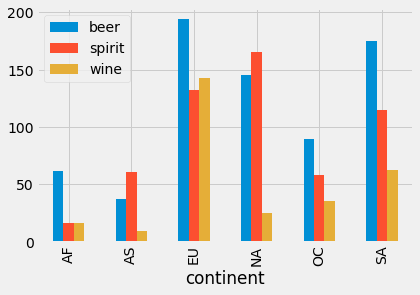

In [116]:
ax = mean_drinks_by_continent.plot.bar()
plt.savefig('mean_drinks.png', bbox_inches='tight')

*Generate a plot with pandas, get the `Figure` object for it, and save that object explicitly, this time as a PDF*

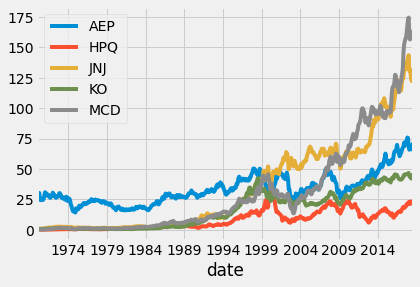

In [118]:
ax = stocks.plot()
ax.get_figure().savefig('stock_over_time.pdf', bbox_inches='tight')

## Key Takeaway

There are many ways to generate `matplotlib` plots, e.g.:

- Pandas plotting methods
- `plt.subplots()`
- `sns.pairplot()`
- `inspector.plot()`

Regardless of how you generate a plot, there should be a way to get hold of its `Axes` object. That object provides access to attributes and methods you can use to modify the result.

## Push Changes

Uncomment and run the lines below to commit your changes to the lesson notebooks and push them to GitHub.

In [ ]:
# !git add .
# !git commit -m "Complete lesson"
# !git push